### 1. Importing all the essential libraries

In [2]:
import string 
import re
import codecs
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import itertools

### 2. Loading the data

In [3]:
english_df = pd.read_csv("europarl-v7.bg-en.en", encoding="utf-8", header=None, names=["English"], on_bad_lines="skip")


In [4]:
english_df.head()

,English
0,Membership of Parliament: see Minutes
1,Approval of Minutes of previous sitting: see M...
2,Membership of Parliament: see Minutes
3,Verification of credentials: see Minutes
4,Documents received: see Minutes


In [5]:
# Loading raw german data
german_df = pd.read_csv("europarl-v7.de-en.de",encoding= "utf-8", header=None, names=["German"], on_bad_lines='skip')
german_df.head()

,German
0,Wiederaufnahme der Sitzungsperiode
1,Im Parlament besteht der Wunsch nach einer Aus...
2,(Das Parlament erhebt sich zu einer Schweigemi...
3,Könnten Sie mir eine Auskunft zu Artikel 143 i...
4,Und zwar sollen derartige Strafen trotz des Gr...


In [6]:
# Loading raw french data

french_df = pd.read_csv("europarl-v7.fr-en.fr", encoding="utf-8", header=None, names=["French"],on_bad_lines="skip")
french_df.head()

,French
0,Reprise de la session
1,Je déclare reprise la session du Parlement eur...
2,Je vous invite à vous lever pour cette minute ...
3,Vous avez probablement appris par la presse et...
4,Ma question porte sur un sujet qui est à l'ord...


In [7]:
# Loading raw spanish data

spanish_df = pd.read_csv("europarl-v7.es-en.es", encoding="utf-8", header=None, names=["Spanish"],on_bad_lines="skip")
spanish_df.head()

,Spanish
0,Reanudación del período de sesiones
1,Invito a todos a que nos pongamos de pie para ...
2,Sabrá usted por la prensa y la televisión que ...
3,Me gustaría que me asesorara sobre el Artículo...
4,El informe Cunha sobre los programas de direcc...


In [8]:
#Loading raw bulgarian data

bulgarian_df = pd.read_csv("europarl-v7.bg-en.bg", encoding="utf-8", header=None, names=['Bulgarian'],on_bad_lines="skip")
bulgarian_df.head()

,Bulgarian
0,Състав на Парламента: вж. протоколи
1,Одобряване на протокола от предишното заседани...
2,Състав на Парламента: вж. протоколи
3,Проверка на пълномощията: вж. протоколи
4,Внасяне на документи: вж. протоколи


In [9]:
# Loading raw Czech data

czech_df = pd.read_csv("europarl-v7.cs-en.cs", encoding="utf-8", header=None, names=['Czech'], on_bad_lines="skip")
czech_df.head()

,Czech
0,Následný postup na základě usnesení Parlamentu...
1,Předložení dokumentů: viz zápis
2,Písemná prohlášení (článek 116 jednacího řádu)...
3,Texty smluv dodané Radou: viz zápis
4,Složení Parlamentu: viz zápis


In [10]:
# Loading raw Danish data

danish_df = pd.read_csv('europarl-v7.da-en.da',encoding= "utf-8", header=None, names=['Danish'], on_bad_lines="skip")
danish_df.head()

,Danish
0,Genoptagelse af sessionen
1,De har udtrykt ønske om en debat om dette emne...
2,Jeg opfordrer Dem til stående at iagttage et m...
3,(Parlamentet iagttog stående et minuts stilhed
4,Gennem pressen og tv vil De være bekendt med e...


In [11]:
# Loading raw Finnish data

finnish_df = pd.read_csv('europarl-v7.fi-en.fi', encoding="utf-8", header=None, names=['Finnish'], on_bad_lines="skip")
finnish_df.head()

,Finnish
0,Istuntokauden uudelleenavaaminen
1,(Parlamentti vietti seisaallaan minuutin hilja...
2,Se on tapaus Aleksandr Nikitin.
3,Miksi terveys- ja turvallisuusasioista vastaav...
4,Miksi parlamentin Brysselin tiloissa tai Stras...


In [12]:
# Loading raw Hungarian data

hungarian_df = pd.read_csv('europarl-v7.hu-en.hu', encoding='utf-8', header=None, names=['Hungarian'], on_bad_lines="skip")
hungarian_df.head()

,Hungarian
0,A Parlament állásfoglalásaival kapcsolatos tov...
1,Dokumentumok benyújtása: lásd a jegyzőkönyvet
2,Írásbeli nyilatkozatok (az Eljárási Szabályzat...
3,A megállapodások szövegeinek Tanács általi elő...
4,A Parlament tagjai: lásd a jegyzőkönyvet


In [13]:
# Loading raw Latvian data

latvian_df = pd.read_csv('europarl-v7.lv-en.lv', encoding='utf-8', header=None, names=['Latvian'], on_bad_lines="skip")
latvian_df.head()

,Latvian
0,Saistībā ar Parlamenta rezolūcijām veiktie pas...
1,Dokumentu iesniegšana (sk. protokolu)
2,Rakstiskas deklarācijas (Reglamenta 116. pants...
3,Padomes nosūtītie nolīgumu teksti (sk. protokolu)
4,Parlamenta sastāvs (sk. protokolu)


In [14]:
# Loading raw Polish data

polish_df = pd.read_csv('europarl-v7.pl-en.pl', encoding='utf-8', header=None, names=['Polish'], on_bad_lines="skip")
polish_df.head()

,Polish
0,Działania podjęte w wyniku rezolucji Parlament...
1,Składanie dokumentów: patrz protokół
2,Oświadczenia pisemne (art. 116 Regulaminu): pa...
3,Teksty porozumień przekazane przez Radę: patrz...
4,Skład Parlamentu: patrz protokół


In [15]:
# Loading raw Portuguese data

portuguese_data = pd.read_csv('europarl-v7.pt-en.pt', encoding='utf-8', header=None, names=['Portuguese'], on_bad_lines="skip")
portuguese_data.head()

,Portuguese
0,Reinício da sessão
1,Convido-os a levantarem-se para um minuto de s...
2,Mais se propõe que a aplicação das sanções sej...
3,E tudo isso em conformidade com os princípios ...
4,É o caso de Alexander Nikitin.


In [16]:
# Loading raw Romanian data

romanian_df = pd.read_csv('europarl-v7.ro-en.ro', encoding='utf-8', header=None, names=['Romanian'], on_bad_lines="skip")
romanian_df.head()

,Romanian
0,Componenţa Parlamentului: a se vedea procesul-...
1,Aprobarea procesului-verbal al şedinţei preced...
2,Componenţa Parlamentului: a se vedea procesul-...
3,Verificarea prerogativelor: a se vedea procesu...
4,Depunere de documente: a se vedea procesul-verbal


In [17]:
# Loading raw Slovenian data

slovenian_df = pd.read_csv('europarl-v7.sl-en.sl', encoding='utf-8', header=None, names=['Slovenian'], on_bad_lines="skip")
slovenian_df.head()

,Slovenian
0,Nadaljnje obravnavanje resolucij Parlamenta: g...
1,Predložitev dokumentov: glej zapisnik
2,Pisne izjave (člen 116): glej zapisnik
3,Posredovanje besedil sporazumov s strani Sveta...
4,Sestava Parlamenta: glej zapisnik


In [18]:
# Loading raw Swedish data

swedish_df = pd.read_csv('europarl-v7.sv-en.sv',encoding= 'utf-8', header=None, names=['Swedish'], on_bad_lines="skip")
swedish_df.head()

,Swedish
0,Återupptagande av sessionen
1,Jag förklarar Europaparlamentets session återu...
2,"Som ni kunnat konstatera ägde ""den stora år 20..."
3,Ni har begärt en debatt i ämnet under sammantr...
4,Jag ber er resa er för en tyst minut.


### 3. Data Preprocessing

In [19]:
for char in string.punctuation:
    print(char, end = ' ')
translate_table = dict((ord(char), None) for char in string.punctuation)

! " # $ % & ' ( ) * + , - . / : ; < = > ? @ [ \ ] ^ _ ` { | } ~ 

In [20]:
# Cleaning the data for english dataset

data_eng = []
lang_eng = []

for i, line in english_df.iterrows():
    line = line['English']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_eng.append(line)
        lang_eng.append("English")

In [21]:
# Cleaning the data for german dataset

data_ger = []
lang_ger = []

for i, line in german_df.iterrows():
    line = line['German']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_ger.append(line)
        lang_ger.append("German")

In [22]:
# Cleaning the data for french dataset

data_fre = []
lang_fre = []

for i, line in french_df.iterrows():
    line = line['French']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_fre.append(line)
        lang_fre.append("French")

In [23]:
# Cleaning the data for spanish dataset

data_esp = []
lang_esp = []

for i, line in spanish_df.iterrows():
    line = line['Spanish']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Spanish")

In [24]:
# Cleaning the data for Bulgarian dataset

data_bul = []
lang_bul = []

for i, line in bulgarian_df.iterrows():
    line = line['Bulgarian']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Bulgarian")

In [25]:
# Cleaning the data for Czech dataset

data_czech = []
lang_czech = []

for i, line in czech_df.iterrows():
    line = line['Czech']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Czech")

In [26]:
# Cleaning the data for Danish dataset

data_dan = []
lang_dan = []

for i, line in danish_df.iterrows():
    line = line['Danish']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Danish")

In [27]:
# Cleaning the data for finnish dataset

data_fin = []
lang_fin = []

for i, line in finnish_df.iterrows():
    line = line['Finnish']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Finnish")

In [28]:
# Cleaning the data for Hugarian dataset

data_hung = []
lang_hung = []

for i, line in hungarian_df.iterrows():
    line = line['Hungarian']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Hungarian")

In [29]:
# Cleaning the data for Latvian dataset

data_lat = []
lang_lat = []

for i, line in latvian_df.iterrows():
    line = line['Latvian']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Latvian")

In [30]:
# Cleaning the data for Polish dataset

data_pol = []
lang_pol = []

for i, line in polish_df.iterrows():
    line = line['Polish']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Polish")

In [31]:
# Cleaning the data for Portuguese dataset

data_port = []
lang_port = []

for i, line in portuguese_data.iterrows():
    line = line['Portuguese']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Portuguese")

In [32]:
# Cleaning the data for Romanian dataset

data_rom = []
lang_rom = []

for i, line in romanian_df.iterrows():
    line = line['Romanian']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Romanian")

In [33]:
# Cleaning the data for Romanian dataset

data_slo = []
lang_slo = []

for i, line in slovenian_df.iterrows():
    line = line['Slovenian']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Slovenian")

### 4. Transforming the data into a single dataset

In [34]:
df = pd.DataFrame({
    "Text" : data_eng+data_ger+data_fre+data_esp+data_bul+data_czech+data_dan+data_fin+data_hung+data_lat+data_port+data_pol+data_rom+data_slo,
    "Language" : lang_eng+lang_ger+lang_fre+lang_esp+lang_bul+lang_czech+lang_dan+lang_fin+lang_hung+lang_lat+lang_port+lang_pol+lang_rom+lang_slo
})

print(df.shape)

(4844097, 2)


In [35]:
df.head()

,Text,Language
0,membership of parliament see minutes,English
1,approval of minutes of previous sitting see mi...,English
2,membership of parliament see minutes,English
3,verification of credentials see minutes,English
4,documents received see minutes,English


In [36]:
df.tail()

,Text,Language
4844092,sestava odborov in delegacij gl zapisnik,Slovenian
4844093,dnevni red naslednje seje gl zapisnik,Slovenian
4844094,zaključek seje,Slovenian
4844095,the sitting closed at,Slovenian
4844096,,Slovenian


In [37]:
df['Language'].value_counts()

Language
French        715471
Spanish       684108
Finnish       608147
Portuguese    560397
Danish        536761
German        509723
Polish        189651
Czech         180978
Slovenian     165360
Latvian       151976
Hungarian     150729
English       150515
Romanian      126746
Bulgarian     113535
Name: count, dtype: int64

<Axes: xlabel='Language', ylabel='count'>

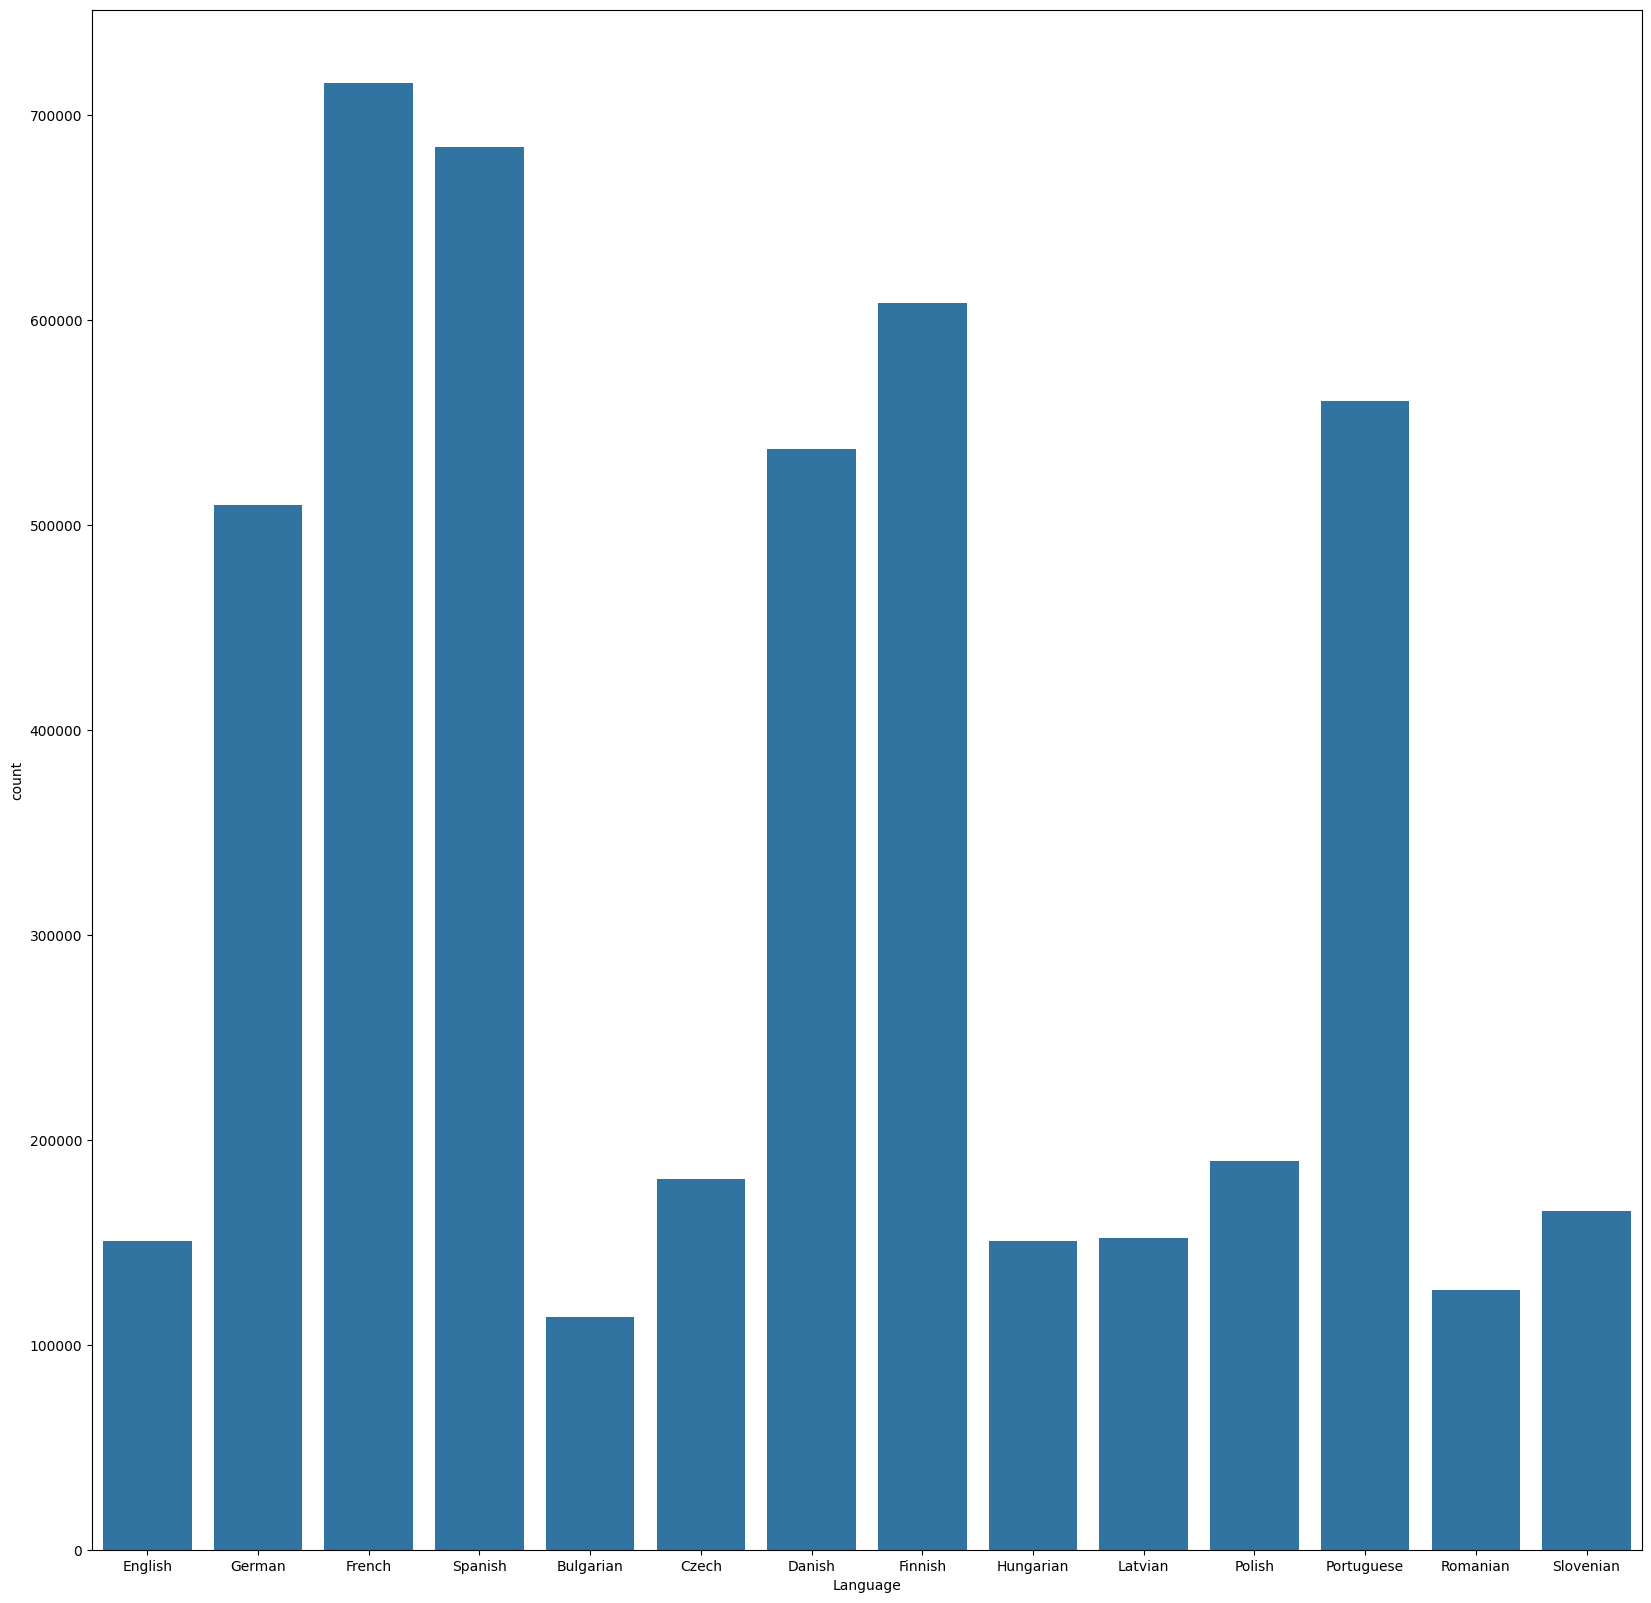

In [38]:
plt.figure(figsize=(20,20))
sns.countplot(x = df['Language'], data=df)

### 5. Splitting the dataset

* Splitting the dataset into Independent and Dependent variables

In [39]:
x = df.iloc[:,0] # Independent Variable
y = df.iloc[:,1] # Dependent Variable

In [40]:
y.head()

0    English
1    English
2    English
3    English
4    English
Name: Language, dtype: object

In [41]:
x.head()

0                 membership of parliament see minutes
1    approval of minutes of previous sitting see mi...
2                 membership of parliament see minutes
3              verification of credentials see minutes
4                       documents received see minutes
Name: Text, dtype: object

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Applying TF-IDF Vectorizer

* `ngram_range` : It collets one , one two, one two three words 
* `analyzer` : We are not going word by word here we are going character by character that why we have used **char**.

In [43]:
vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(1,3), analyzer='char')
# x = vectorizer.fit_transform(df['Text'])

In [44]:
pipe_mnb = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('clf', MultinomialNB())
])

In [45]:
pipe_mnb.fit(x_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('clf', MultinomialNB())])

In [46]:
pipe_lr = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('lr_clf', LogisticRegression())
])

pipe_lr.fit(x_train, y_train)

In [49]:
pipe_lr.fit(x_train, y_train)

MemoryError: 

## Model Prediction for Logistic Regression

## Model evaluation for Logistic Regression

In [48]:
# pipe_lr.fit(x_train, y_train)
lr_predicted = pipe_lr.predict(x_test)
lr_acc = (metrics.accuracy_score(y_test, lr_predicted))*100
print('The logistic regression has:',lr_acc,'% accuracy')

KeyboardInterrupt: 

## Model Prediction for MultinomialNB

In [ ]:
mnb_predicted = pipe_mnb.predict(x_test)

## Model Evaluation for MultinomialNB

In [ ]:
mnb_acc = (metrics.accuracy_score(y_test, mnb_predicted))*100
print('The MultinomialNB has :',mnb_acc,'% accuracy')

The MultinomialNB has : 92.0262091176634 % accuracy


## Evaluation matrix for Logistic Regression

In [ ]:
matrix = metrics.confusion_matrix(y_test, lr_predicted)
print('Confusion matrix: \n', matrix)

Confusion matrix: 
 [[1083    0    0    0   40    1    4   10    1    1    7    2   65    2
     0]
 [ 108 1125    0    0   14    0    3    2    1    0    3    1   19    3
     0]
 [   1    0 1240    0    1    0    0    0    0    0    1    0    1    0
     0]
 [   0    0    0 1177    2    0    0    0    0    1    1    0    0    1
     0]
 [ 178    0    0    0  978    0    0    1    1    1    0    0    4    0
     0]
 [   3    1    1    0    1 1222    0    0    0    1    0    0    0    1
     0]
 [   1    0    1    0    2    0 1183    0    0    0    0    0    1    0
     0]
 [   3    0    1    0    0    0    0 1217    0    1    1    0    0    0
     0]
 [  96    2    0    0   11    0    2    3 1040    0    6    0   14    0
     3]
 [ 107    0    0    0   10    0    2    0    2 1045    4    0   15    0
     1]
 [ 103    2    0    0   13    0    3    2    2    2 1104    0   18    2
     3]
 [   0    0    0    0    0    0    0    0    0    0    0 1139    1    2
     4]
 [ 227    0    0    

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Actual labels',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


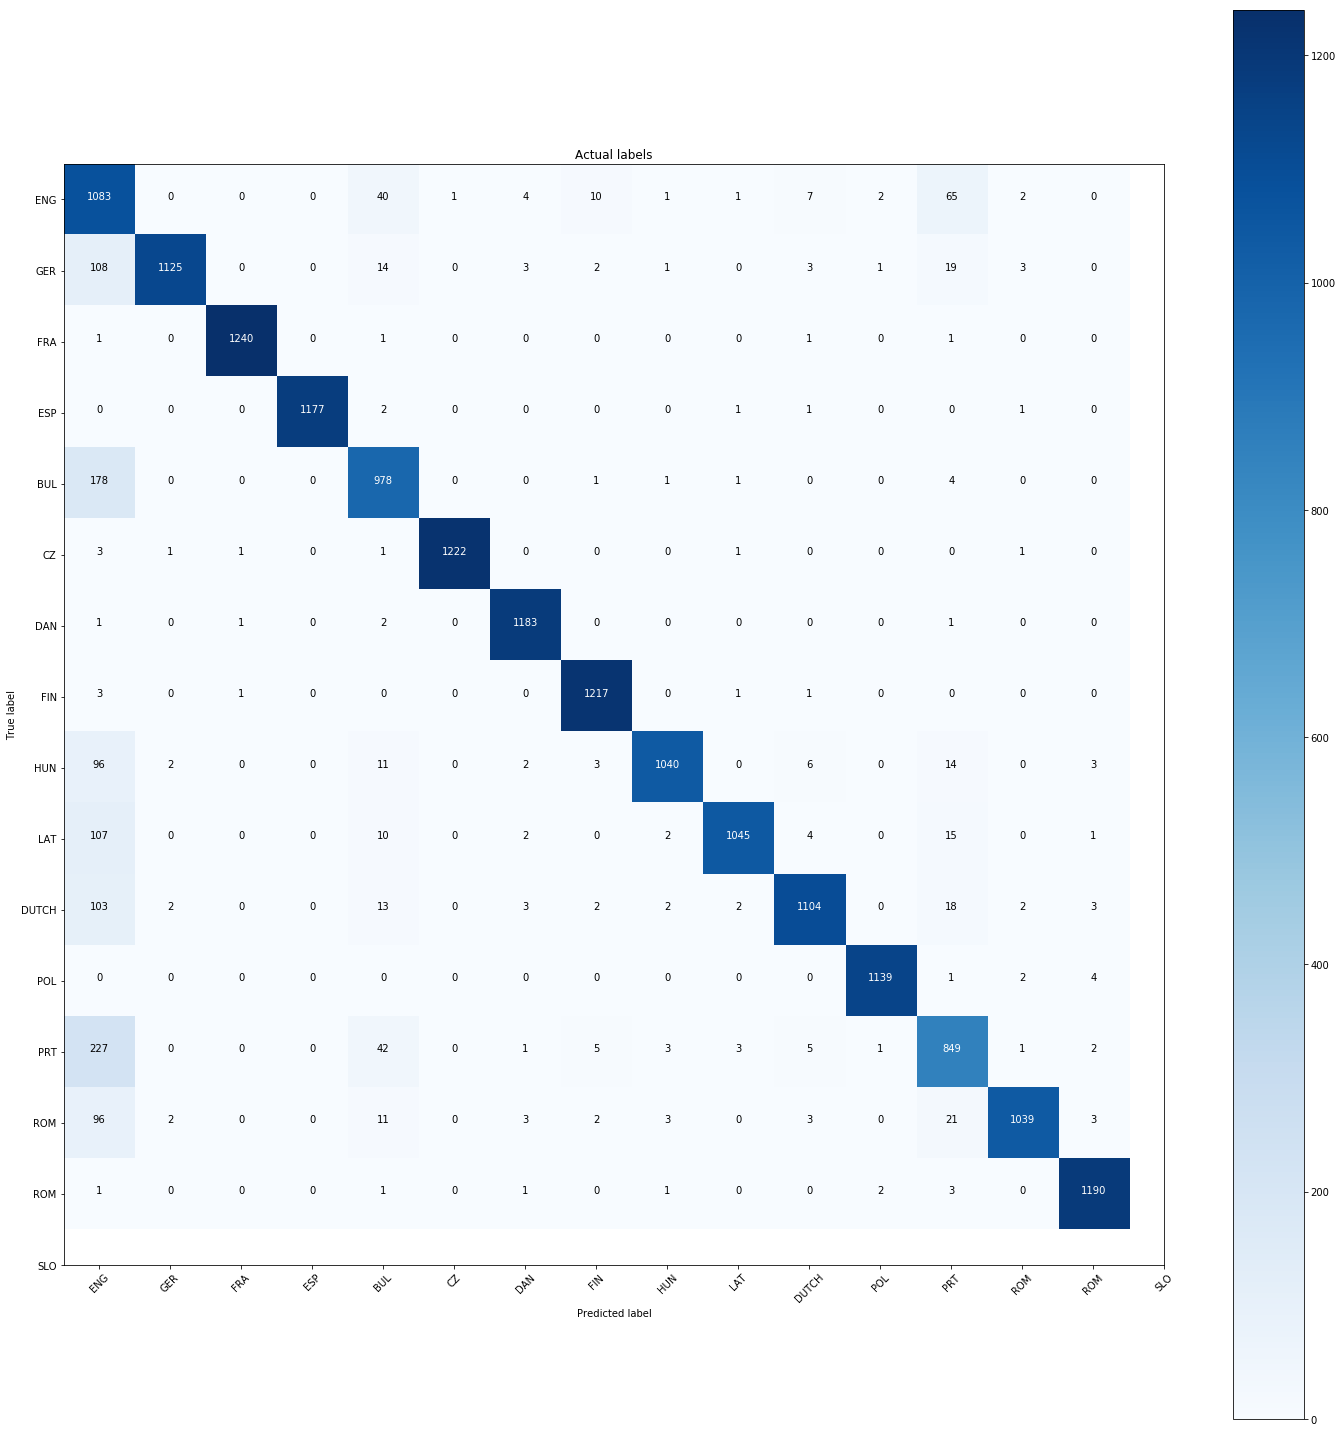

In [ ]:
plt.figure(figsize=(20,20))
plot_confusion_matrix(matrix, classes = ['ENG', 'GER', 'FRA', 'ESP','BUL','CZ','DAN','FIN','HUN','LAT','DUTCH','POL','PRT','ROM','ROM','SLO'])

In [ ]:
import pickle

In [ ]:
lrfile = open('lrmodel.pckl', 'wb')
pickle.dump(pipe_lr, lrfile)
lrfile.close()